# Transformer Model Testing

This notebook demonstrates the basic functionality of our custom transformer implementation.

In [1]:
import sys
sys.path.append('../')  # Add parent directory to path

import torch
import numpy as np
import matplotlib.pyplot as plt
from src.model import CustomTransformer

# Set random seed for reproducibility
torch.manual_seed(42)

## Initialize a Small Transformer

We'll create a minimal transformer with small dimensions for testing.

In [2]:
# Model parameters
vocab_size = 100  # Small vocabulary for testing
d_model = 64     # Small embedding dimension
n_heads = 4      # Number of attention heads
n_layers = 2     # Number of transformer layers
d_ff = 128       # Feed-forward dimension
max_seq_length = 16  # Short sequences for testing

# Initialize model
model = CustomTransformer(
    vocab_size=vocab_size,
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    d_ff=d_ff,
    max_seq_length=max_seq_length
)

print(f'Total parameters: {sum(p.numel() for p in model.parameters())}')

Total parameters: 79844


## Create Sample Input

Generate a batch of random sequences to test the model.

In [3]:
# Create sample batch
batch_size = 4
seq_length = 10  # Use shorter sequence than max_seq_length

# Random input tokens
x = torch.randint(0, vocab_size, (batch_size, seq_length))
print('Input shape:', x.shape)
print('Sample sequence:', x[0])  # Show first sequence in batch

Input shape: torch.Size([4, 10])
Sample sequence: tensor([84, 87,  3, 93, 77,  2, 58, 87, 11, 51])


## Test Forward Pass

Run the input through the transformer and examine the output.

In [4]:
# Forward pass
with torch.no_grad():  # No need to track gradients for testing
    output = model(x)

print('Output shape:', output.shape)

# Examine output probabilities for first token of first sequence
first_token_probs = torch.softmax(output[0, 0], dim=0)
print('Probability distribution for first token:')
plt.figure(figsize=(10, 4))
plt.bar(range(vocab_size), first_token_probs.numpy())
plt.title('Output Probability Distribution (First Token)')
plt.xlabel('Token ID')
plt.ylabel('Probability')
plt.show()

AttributeError: 'tuple' object has no attribute 'shape'

## Test with Attention Mask

Demonstrate the effect of masking on the transformer's output.

In [6]:
# Create a simple attention mask (mask out second half of sequence)
mask = torch.ones(batch_size, seq_length, seq_length)
mask[:, :, seq_length//2:] = 0  # Mask out second half

# Forward pass with mask
with torch.no_grad():
    masked_output = model(x, mask)

# Compare outputs
print('Output difference (masked vs unmasked):')
diff = torch.abs(output - masked_output).mean().item()
print(f'Average absolute difference: {diff:.4f}')

Output difference (masked vs unmasked):
Average absolute difference: 0.4136


## Model Response to Different Inputs

Test how the model responds to different input patterns.

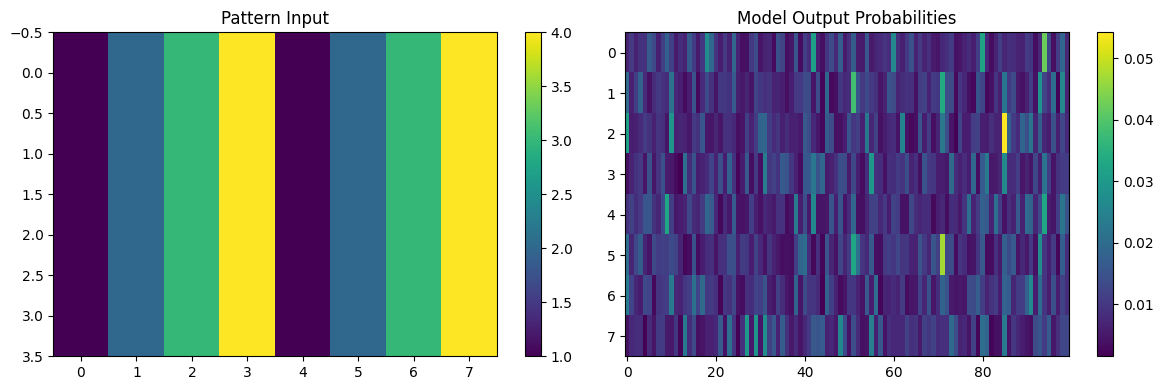

In [ ]:
# Create a repeating pattern input
pattern = torch.tensor([1, 2, 3, 4] * (seq_length // 4))
pattern_input = pattern.repeat(batch_size, 1)

# Forward pass with pattern
with torch.no_grad():
    pattern_output = model(pattern_input)

# Visualize output for the pattern
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(pattern_input.numpy(), aspect='auto')
plt.title('Pattern Input')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(torch.softmax(pattern_output[0], dim=1).numpy(), aspect='auto')
plt.title('Model Output Probabilities')
plt.colorbar()
plt.tight_layout()
plt.show()